In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [50]:
def imshow(img):
    plt.figure(figsize=(10, 7))
    plt.imshow(img[:,:,::-1])


In [15]:
img = cv2.imread('img/noisy.png')

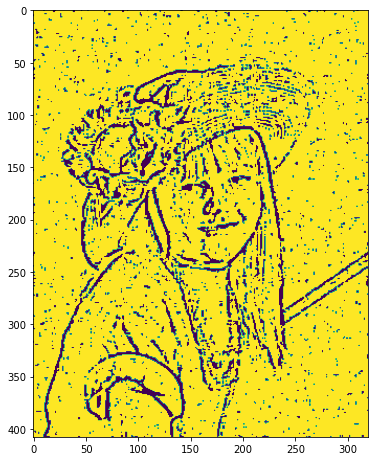

In [41]:
copy1 = img.copy()

def sketch_image(img):
    """Sketches the image applying a laplacian operator to detect the edges"""

    # Convert to gray scale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply median filter
    img_gray = cv2.medianBlur(img_gray, 5)

    # Detect edges using cv2.Laplacian()
    edges = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=5)

    # Threshold the edges image:
    ret, thresholded = cv2.threshold(edges, 230, 255, cv2.THRESH_BINARY_INV)

    return thresholded

res = sketch_image(copy1)
res.shape
plt.figure(figsize=(6, 12))
plt.imshow(res)

In [31]:
np.ones((1,3), dtype='float') * 110

array([[110., 110., 110.]])

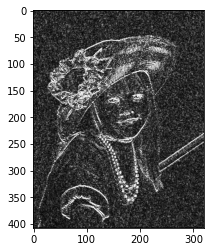

In [59]:
copy2 = img.copy()
copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)
gradient_x = cv2.Sobel(copy2, cv2.CV_16S, 1, 0, 3)
gradient_y = cv2.Sobel(copy2, cv2.CV_16S, 0, 1, 3)

# Conversion to an unsigned 8-bit type:
abs_gradient_x = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)

sobel = cv2.addWeighted(abs_gradient_x, 0.1, abs_gradient_y, 0.9, 0)
plt.imshow(sobel, cmap='gray')

In [60]:
!ls img/

4.png          n.png          notes.png      text.png
clean-text.jpg noisy.png      sketch.png


((408, 320, 3), (408, 320, 3))

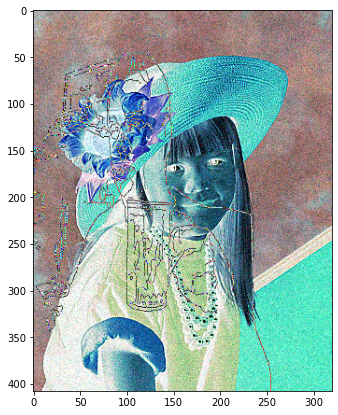

In [132]:
sketch = cv2.imread('img/sketch.png')
sketch = cv2.resize(sketch, (sketch.shape[0]-160, sketch.shape[1]-232))
copy3 = img.copy()
bitwise_or = cv2.bitwise_xor(copy3, sketch)
imshow(bitwise_or)
sketch.shape, copy3.shape

In [140]:
COLORMAP_AUTUMN = 0
COLORMAP_BONE = 1
COLORMAP_JET = 2
COLORMAP_WINTER = 3
COLORMAP_RAINBOW = 4
COLORMAP_OCEAN = 5
COLORMAP_SUMMER = 6
COLORMAP_SPRING = 7
COLORMAP_COOL = 8
COLORMAP_HSV = 9
COLORMAP_HOT = 11
COLORMAP_PINK = 10
COLORMAP_PARULA = 12

In [ ]:
def build_sample_image():
    """Builds a sample image with 50x50 regions of different tones of gray"""

    # Define the different tones. In this case: 60, 90, 120, ..., 210
    # The end of interval (240) is not included
    tones = np.arange(start=60, stop=240, step=30)

    # Initialize result withe the first 50x50 region with 30-intensity level
    result = np.ones((50, 50, 3), dtype="uint8") * 30

    # Build the image concatenating horizontally the regions:
    for tone in tones:
        img = np.ones((50, 50, 3), dtype="uint8") * tone
        result = np.concatenate((result, img), axis=1)

    return result

In [142]:
build_sample_image()

NameError: name 'build_sample_image' is not defined